![data-x](https://raw.githubusercontent.com/afo/data-x-plaksha/master/imgsource/dx_logo.png)

___

#### NAME:

#### STUDENT ID:
___

## [Solutions] Homework - Pandas

## Pandas Introduction

In [1]:
# Load required modules
import numpy as np
import pandas as pd

#### Data description
>Data source: http://www.fao.org/nr/water/aquastat/data/query/index.html<br>
>Data, units:<br>
>* GDP, current USD (CPI adjusted)<br>
>* NRI, $mm/yr$<br>
>* Population density, $inhab/km^2$<br>
>* Total area of the country, $1000 ha = 10km^2$<br>
>* Total Population, unit $1000$ inhabitants<br>

___

<br>

**1.1) Read the CSV file called** ```data3.csv``` **into a DataFrame and name it** ```df``` 

In [2]:
df=pd.read_csv('data3.csv')

<br>

**1.2) Display the first 10 rows of the dataframe**

In [3]:
df.head(10)

,Area,Area Id,Variable Name,Variable Id,variable,Year,Month,Day,Value,Symbol,Md
0,Argentina,9,Total area of the country,4100,4100,1962.0,NaN,NaN,278040.0,E,NaN
1,Argentina,9,Total area of the country,4100,4100,1967.0,NaN,NaN,278040.0,E,NaN
2,Argentina,9,Total area of the country,4100,4100,1972.0,NaN,NaN,278040.0,E,NaN
3,Argentina,9,Total area of the country,4100,4100,1977.0,NaN,NaN,278040.0,E,NaN
4,Argentina,9,Total area of the country,4100,4100,1982.0,NaN,NaN,278040.0,E,NaN
5,Argentina,9,Total area of the country,4100,4100,1987.0,NaN,NaN,278040.0,E,NaN
6,Argentina,9,Total area of the country,4100,4100,1992.0,NaN,NaN,278040.0,E,NaN
7,Argentina,9,Total area of the country,4100,4100,1997.0,NaN,NaN,278040.0,E,NaN
8,Argentina,9,Total area of the country,4100,4100,2002.0,NaN,NaN,278040.0,E,NaN
9,Argentina,9,Total area of the country,4100,4100,2007.0,NaN,NaN,278040.0,E,NaN


<br>

**1.3 Display the column names**

In [4]:
df.columns

Index(['Area', 'Area Id', 'Variable Name', 'Variable Id', 'variable', 'Year',
       'Month', 'Day', 'Value', 'Symbol', 'Md'],
      dtype='object')

<br>

**1.4) Use** ```.iloc``` **to display the first 3 rows and first 4 columns**

In [5]:
## MORE THAN ONE WAY TO DO THIS ##
df.iloc[0:3, 0:4]

,Area,Area Id,Variable Name,Variable Id
0,Argentina,9,Total area of the country,4100
1,Argentina,9,Total area of the country,4100
2,Argentina,9,Total area of the country,4100


## Data Pre-Processing

<br>

**2.1) Find all the rows that  have** ```NaN``` **in the ```Symbol``` column. Display first 3 rows**

>**Optional:** You could achieve the requested using a [mask](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mask.html)

In [6]:
# find all NaN values in Series = 'Symbol'
df_nan = pd.isnull(df["Symbol"])

# get only those rows that meet the previous condition
result = df[df_nan]

# by default .head() returns first 3 rows
result.head(3)

,Area,Area Id,Variable Name,Variable Id,variable,Year,Month,Day,Value,Symbol,Md
10,Argentina,9,Total area of the country,4100,4100,2012.0,NaN,NaN,278040.00,NaN,NaN
32,Argentina,9,Population density,4107,4107,2002.0,NaN,NaN,13.63,NaN,NaN
33,Argentina,9,Population density,4107,4107,2007.0,NaN,NaN,14.38,NaN,NaN


<br>

**2.2) Remove all columns and rows that contain** ```NaN``` **values**

>**Note:** Sometimes it is best to just discard any data that contains missing values. There are some workarounds, but for now we will try to get rid of the NaN valued rows and columns.  

>To do this: (1) Check which columns contain only 'NaN' values and drop them. Then, (2) drop rows that have any entry with a value 'NaN'. Finally, (3) store the result in place as ```df1``` and (4) display the shape and last 5 rows of the  cleaned dataframe.

In [7]:
# check with series contains only NaN values
print("## BEFORE ##")
print(pd.isnull(df).all())
print("\n", df.shape)

# drop columns containing all NaN values
df = df.dropna(how='all', axis=1)

# drop rows containing any NaN values
df1 = df.dropna(axis=0)

# sanity check
print("\n\n## AFTER ##")
print(pd.isnull(df1).all())

# requested output
print("\n", df1.shape)
df1.tail()

## BEFORE ##
Area             False
Area Id          False
Variable Name    False
Variable Id      False
variable         False
Year             False
Month             True
Day               True
Value            False
Symbol           False
Md                True
dtype: bool

 (455, 11)


## AFTER ##
Area             False
Area Id          False
Variable Name    False
Variable Id      False
variable         False
Year             False
Value            False
Symbol           False
dtype: bool

 (420, 8)


,Area,Area Id,Variable Name,Variable Id,variable,Year,Value,Symbol
450,Sweden,210,Total area of the country,4100,4100,2002.0,45030.0,E
451,Sweden,210,Total area of the country,4100,4100,2007.0,45030.0,E
452,Sweden,210,Total area of the country,4100,4100,2012.0,44742.0,E
453,Sweden,210,Total area of the country,4100,4100,2014.0,44742.0,E
454,Sweden,210,Total population,4104,4104,1962.0,7576.0,E


<br>

**2.3) Remove redundant/duplicate features/columns**

If you took the time to explore the above builtin functions, you have noticed that you can specify how you want the check to occur -- accross columns, or accross rows. Use what you learned in **2.3** and apply it to removing duplicate columns. Print shape and column names.

In [8]:
## Observe that 'Variable Id' and 'variable' appear to be duplicates ##

# check if duplicates
print("\nMatch? ", df1['Variable Id'].equals(df1['variable']))

# drop variable
df1 = df1.drop(columns=['variable'])

print("\n", df1.shape)
print("\n", df1.columns)


Match?  True

 (420, 7)

 Index(['Area', 'Area Id', 'Variable Name', 'Variable Id', 'Year', 'Value',
       'Symbol'],
      dtype='object')


<br>

**2.4) Remove redundant/duplicate Entries**

**Note:** In the data set we are working with, you can manually explore the data to see which rows contain duplicate data. However, imagine this task when you have millions of entries. Pandas has builtin functionality that allows you to do this -- at the DataFrame and Series object level. Take a look at the following functions 
>[.drop_duplicates( )](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#duplicate-data)<br>
>[.duplicated( )](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html?highlight=duplicate%20columns)<br>
>[.equals( )](https://www.w3resource.com/pandas/series/series-equals.php)<br>
>[.where( )](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.where.html)

See if you can figure out how to solve this problem using one of the above methods, to drop any row in ```df1``` that is an identical entry.  Save the new DataFrame as ```df2```, then display the shape and last 5 rows of the new dataframe.

In [9]:
## MORE THAN ONE WAY TO DO THIS ##

# create mask of duplicate rows except first instance based on all columns
mask = df1.duplicated(keep = 'first')

# passing everything but duplicates contained in mask
df2 = df1[~mask]

print(df2.shape)
df2.tail()

(365, 7)


,Area,Area Id,Variable Name,Variable Id,Year,Value,Symbol
442,Sweden,210,Total area of the country,4100,1962.0,45030.0,E
443,Sweden,210,Total area of the country,4100,1967.0,45030.0,E
444,Sweden,210,Total area of the country,4100,1972.0,45030.0,E
445,Sweden,210,Total area of the country,4100,1977.0,45030.0,E
446,Sweden,210,Total area of the country,4100,1982.0,45030.0,E


<br>

**2.5) Display all the unique values in your new dataframe for each of the columns:** ```Area```, ```Variable Name```, ```Year```

In [10]:
for column in ['Area','Variable Name','Year']:
    print("\n", df2[column].unique())


 ['Argentina' 'Australia' 'Germany' 'Iceland' 'Ireland' 'Sweden'
 'United States of America']

 ['Total area of the country' 'Total population' 'Population density'
 'Gross Domestic Product (GDP)' 'National Rainfall Index (NRI)']

 [1962. 1967. 1972. 1977. 1982. 1987. 1992. 1997. 2002. 2007. 2014. 2012.
 2015. 1963. 1970. 1974. 1978. 1984. 1990. 1964. 1981. 1985. 1996. 2001.
 1969. 1973. 1979. 1993. 1971. 1975. 1986. 1991. 1998. 1965. 1983. 1988.
 1995. 2000.]


<br>

**2.6) Convert data to datetime objects, sort by datetime ascending, reset index, and deep copy**

>**To-Do:**<br>
>1. Convert the ```Year``` column ```float64``` values to pandas [datetime](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html) objects, where each year is represented as the first day of that calendar year -- e.g. ```1962.0``` will be represented as ```1962-01-01 00:00:00```.<br>
>2. [Sort](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html) by datetime ascending -- i.e. ```1962-01-01 00:00:00,  1963-01-01 00:00:00,...```.<br>
>3. [Deepcopy](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html) ```df2``` into a new DataFrame ```df```. [Why deep copy?](https://realpython.com/copying-python-objects/)<br>
>4. Display the DataFrame shape and head. 

In [11]:
# Convert to datetime objects
df2['Year'] = pd.to_datetime(df2['Year'],format='%Y')

# make deepcopy to df
df = df2.copy(deep = True)

## Sanity Check ##
print("\ndf2 memory pointer --> ", hex(id(df2)))
print("df  memory pointer --> ", hex(id(df)))
print("\n")

# display dataframe shape and head
print(df.shape)
df.head()


df2 memory pointer -->  0x7f5ce00b3a20
df  memory pointer -->  0x7f5ce036d7b8


(365, 7)


/home/ehch/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Area,Area Id,Variable Name,Variable Id,Year,Value,Symbol
0,Argentina,9,Total area of the country,4100,1962-01-01,278040.0,E
1,Argentina,9,Total area of the country,4100,1967-01-01,278040.0,E
2,Argentina,9,Total area of the country,4100,1972-01-01,278040.0,E
3,Argentina,9,Total area of the country,4100,1977-01-01,278040.0,E
4,Argentina,9,Total area of the country,4100,1982-01-01,278040.0,E


## Exploratory Data Analysis (EDA) - Data Visualization

<br>

**3.1) [Plot](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html) a bar graph showing the [count](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) for [each unique value in the column 'Area'](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html). Give it a title**

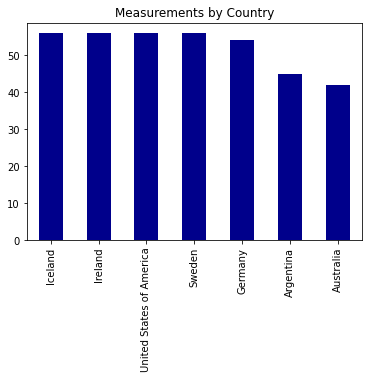

In [22]:
## More than one way to do this ##
# Extract data
counts = df['Area'].value_counts()

# plot data
ax = counts.plot.bar(title = "Measurements by Country", rot = '90', color='darkblue')

## Exploratory Data Analysis (EDA) - Statistical Analysis

<br>

**4.1)  Create a DataFrame** ```dftemp``` **to store rows where** ```Area``` **is** ```Iceland```, **then display a slice of the new DataFrame**

In [13]:
# Get Area is Iceland
dftemp=df[df['Area']=='Iceland']

# display slice
dftemp[15:20]

,Area,Area Id,Variable Name,Variable Id,Year,Value,Symbol
181,Iceland,99,Total population,4104,1977-01-01,222.1,E
182,Iceland,99,Total population,4104,1982-01-01,233.1,E
183,Iceland,99,Total population,4104,1987-01-01,246.9,E
184,Iceland,99,Total population,4104,1992-01-01,259.9,E
185,Iceland,99,Total population,4104,1997-01-01,272.8,E


<br>

**4.2) Filter data within a range**

>**To Do:** Using the previously created DataFrame, ```dftemp```, print the years when the National Rainfall Index (NRI) was greater than 900 and less than 950 in Iceland. 

In [14]:
# get data within range
dftemp = dftemp[dftemp['Variable Name']=='National Rainfall Index (NRI)']
dftemp = dftemp[dftemp['Value']>900]
dftemp = dftemp[dftemp['Value']<950]
dftemp

,Area,Area Id,Variable Name,Variable Id,Year,Value,Symbol
217,Iceland,99,National Rainfall Index (NRI),4472,1981-01-01,932.6,E
221,Iceland,99,National Rainfall Index (NRI),4472,1998-01-01,923.4,E


<br>

**4.3) Create subset of data**


>**To Do:** Create a new DataFrame called ```df_usa``` that only contains values where ```Area``` is equal to ```United States of America```. Set the indices to be the ```Year``` column   (Use ```.set_index( )```, with the inplace paratmeter set to ```inplace=True```). Display the dataframe head.

In [15]:
# get copy of data to avoid pass by reference issues
df_usa = df1[df1['Area']=='United States of America'].copy(deep = True)
df_usa.set_index('Year', inplace=True)
print(df_usa.shape)
df_usa.head()

(75, 6)


,Area,Area Id,Variable Name,Variable Id,Value,Symbol
Year,,,,,,
1962.0,United States of America,231,Total area of the country,4100,962909.0,E
1967.0,United States of America,231,Total area of the country,4100,962909.0,E
1972.0,United States of America,231,Total area of the country,4100,962909.0,E
1977.0,United States of America,231,Total area of the country,4100,962909.0,E
1982.0,United States of America,231,Total area of the country,4100,962909.0,E


 <br>

**4.4) [Stack](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html?highlight=stack%20unstack) and [Unstack](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.unstack.html?highlight=stack%20unstack) DataFrame**

>**To Do:** Pivot ```df_usa``` so that the unique values in the column ```Variable Name``` becomes the columns. The DataFrame values should be the ones in the the ```Value``` column. Save it in ```df_usa```. Display the dataframe shape and head. <br><br>
>**Note:** [Pivot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html#pandas.DataFrame.pivot) does not work if you have dupiclate entries --> ```ValueError: Index contains duplicate entries, cannot reshape```. You may need to drop index duplicates, or you could use [reset_index](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html) and [pivot_table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) together, or [perform additional preprocessing](https://stackoverflow.com/questions/28651079/pandas-unstack-problems-valueerror-index-contains-duplicate-entries-cannot-re) to get rid of the error.

In [16]:
# Reset index to defaul but keep old index, `Year` as a feature
re_indexed = df_usa.reset_index(drop = False)

# pivot dataframe using pivot_table
table = pd.pivot_table(re_indexed, values = 'Value', index = 'Year', columns = ['Variable Name'])

# Sanity check
print(table.shape)
table.head()

(19, 5)


Variable Name,Gross Domestic Product (GDP),National Rainfall Index (NRI),Population density,Total area of the country,Total population
Year,,,,,
1962.0,6.050000e+11,NaN,19.93,962909.0,191861.0
1965.0,NaN,928.5,NaN,NaN,NaN
1967.0,8.620000e+11,NaN,21.16,962909.0,203713.0
1969.0,NaN,952.2,NaN,NaN,NaN
1972.0,1.280000e+12,NaN,22.14,962909.0,213220.0


 <br>

**4.5)  Rename Features**

>**To Do:** Rename the ```Gross Domestic Product (GDP)```, ```National Rainfall Index (NRI)```, ```Population density```, ```Total area of the country```, ```Total population``` columns as ```GDP```,```NRI```,```PD```,```Area```, ```Population```, respectively. Display the head.

In [17]:
# check columns
print(table.columns)

# same number of features as items in list. Rename
table.columns = ['GDP','NRI','PD','Area','Population']
table.head()

Index(['Gross Domestic Product (GDP)', 'National Rainfall Index (NRI)',
       'Population density', 'Total area of the country', 'Total population'],
      dtype='object', name='Variable Name')


,GDP,NRI,PD,Area,Population
Year,,,,,
1962.0,6.050000e+11,NaN,19.93,962909.0,191861.0
1965.0,NaN,928.5,NaN,NaN,NaN
1967.0,8.620000e+11,NaN,21.16,962909.0,203713.0
1969.0,NaN,952.2,NaN,NaN,NaN
1972.0,1.280000e+12,NaN,22.14,962909.0,213220.0


<br>

**4.6) Replace Missing Data**

>**To Do:** Replace all *'Nan'* values in ```df_usa``` with ```0```. Display the head of the dataframe.

In [18]:
# find out number of NaNs per column
print("No. NaNs Before: ")
print(table.isnull().sum())

# replace NaNs with 0s
table=table.fillna(0)

print("\nNo. NaNs After: ")
print(table.isnull().sum())
print("\n")
table.head()

No. NaNs Before: 
GDP            7
NRI           11
PD             7
Area           7
Population     7
dtype: int64

No. NaNs After: 
GDP           0
NRI           0
PD            0
Area          0
Population    0
dtype: int64




,GDP,NRI,PD,Area,Population
Year,,,,,
1962.0,6.050000e+11,0.0,19.93,962909.0,191861.0
1965.0,0.000000e+00,928.5,0.00,0.0,0.0
1967.0,8.620000e+11,0.0,21.16,962909.0,203713.0
1969.0,0.000000e+00,952.2,0.00,0.0,0.0
1972.0,1.280000e+12,0.0,22.14,962909.0,213220.0


<br>

**4.7) Scale Data**

>**To Do:** Multiply the ```Area``` column for all rows by ```10``` (so instead of $1000 ha$, the unit becomes $100 ha = 1km^2$). Display the dataframe head.

In [19]:
# Scale elements in column
table['Area'] = table['Area'] * 10
table.head()

,GDP,NRI,PD,Area,Population
Year,,,,,
1962.0,6.050000e+11,0.0,19.93,9629090.0,191861.0
1965.0,0.000000e+00,928.5,0.00,0.0,0.0
1967.0,8.620000e+11,0.0,21.16,9629090.0,203713.0
1969.0,0.000000e+00,952.2,0.00,0.0,0.0
1972.0,1.280000e+12,0.0,22.14,9629090.0,213220.0


<br>

**4.8)  Feature Engineering**

>**To Do:** Create a new column in ```df_usa``` called ```GDP/capita``` and populate it with the calculated GDP per capita. Round the results to two decimal points. Display the dataframe head.

<br>

$$GDP~per~capita = \frac{GDP}{Population} * 1000$$

<br>

In [20]:
# Create feature
table['GDP/capita'] = pd.Series(table['GDP'] / (table['Population'] * 1000)).round(2)
table.head()

,GDP,NRI,PD,Area,Population,GDP/capita
Year,,,,,,
1962.0,6.050000e+11,0.0,19.93,9629090.0,191861.0,3153.32
1965.0,0.000000e+00,928.5,0.00,0.0,0.0,NaN
1967.0,8.620000e+11,0.0,21.16,9629090.0,203713.0,4231.44
1969.0,0.000000e+00,952.2,0.00,0.0,0.0,NaN
1972.0,1.280000e+12,0.0,22.14,9629090.0,213220.0,6003.19


<br>

**4.9) Data Extraction**

>**To Do:** Find the maximum value of the ```NRI``` column in the US (using pandas methods). What year does the max value occur? Display the values.

In [21]:
# find index of highest NRI entry and extact value
max_NRI = table.NRI[table.NRI == table.NRI.max()]
print ('Max: \n', max_NRI)

Max: 
 Year
1992.0    1020.0
Name: NRI, dtype: float64


___

### Deliverables

Please submit your the following via the instructed method (lecture or Syllabus): 

>(1) A copy of your work, either a downloaded notebook or a pdf, by the assignment deadline

<br>

**Note:** Don't gorget to restart your kernel prior to extracting your data.

>```Kernel --> Restart Kernel and Run all Cells```<br>
>```File --> Export Notebooks As --> PDF``` (or as instructed)

___